In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
# Build a dataset
data = pd.read_csv('F:\可视化\Exp2-zjh\sunshine.csv')
df = pd.DataFrame(data)

In [41]:
df["city"] = df["city"] +" "+ df["lon"].round(2).map(str) + " " + df["lat"].round(2).map(str)
df["city"]

0     Seattle -122.34 47.61
1     Seattle -122.34 47.61
2     Seattle -122.34 47.61
3     Seattle -122.34 47.61
4     Seattle -122.34 47.61
              ...          
67     Chicago -87.62 41.88
68     Chicago -87.62 41.88
69     Chicago -87.62 41.88
70     Chicago -87.62 41.88
71     Chicago -87.62 41.88
Name: city, Length: 72, dtype: object

In [42]:
df.drop(['lon'],axis=1,inplace=True)
df.drop(['lat'],axis=1,inplace=True)
df.drop(['monthnum'],axis=1,inplace=True)

# Show 3 first rows
df.head(5)

,city,month,sunshine
0,Seattle -122.34 47.61,Jan,69
1,Seattle -122.34 47.61,Feb,108
2,Seattle -122.34 47.61,Mar,178
3,Seattle -122.34 47.61,Apr,207
4,Seattle -122.34 47.61,May,253


下面是一个辅助函数，它给定了条形图的定位角度和条形图中使用的偏移量，确定了标签的旋转和对齐。

In [43]:
def get_label_rotation(angle, offset):
    # 旋转必须以度数指定
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

这是实际将标签（使用 ax.text()）添加到绘图的函数：

In [44]:
def add_labels(angles, values, labels, offset, ax):
    
    # 这是条形末端和标签之间的空间
    padding = 2
    
    # 迭代角度、值和标签
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # 获取文本旋转和对齐
        rotation, alignment = get_label_rotation(angle, offset)

        # 添加文本
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )

让我们创建 ANGLES，它给出了条形图所在的位置。 VALUES 数组包含条形的高度，而 LABELS 存储标签。

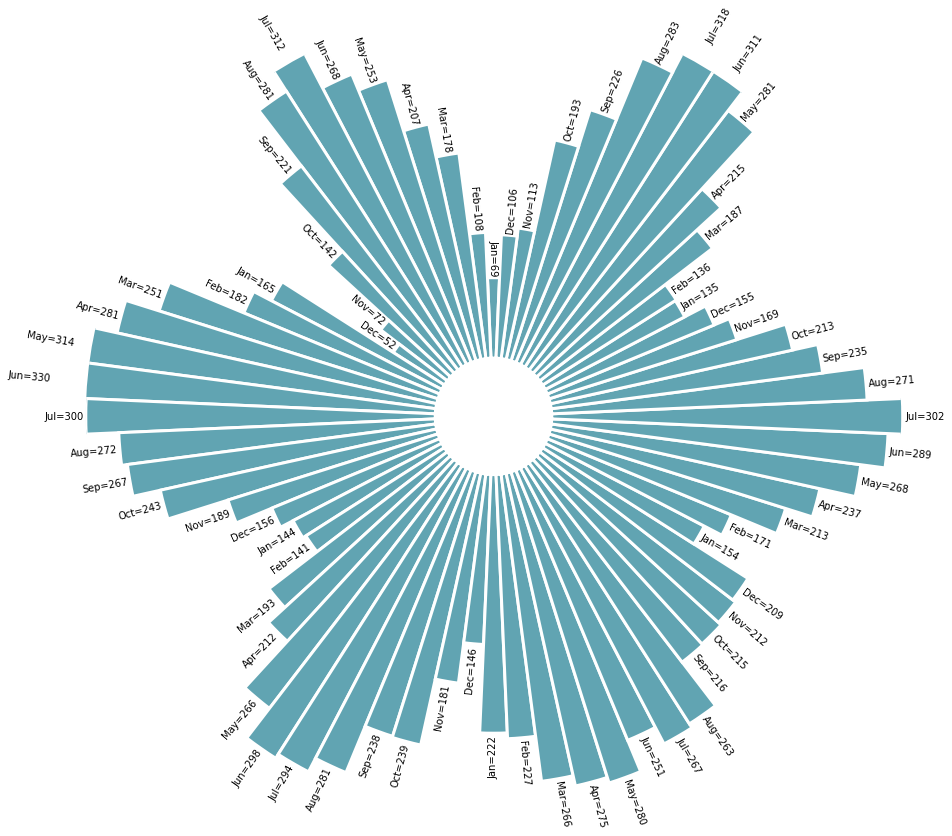

In [52]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["sunshine"].values
df["month"] = df["month"] + "=" + df["sunshine"].map(str)
LABELS = df["month"].values 
GROUP = df["city"].values

# 确定每个条的宽度。 
# 周长是“2 * pi”，将总宽度除以条形数量。
WIDTH = 2 * np.pi / len(VALUES)

# 确定放置第一条的位置。. 
OFFSET = np.pi / 2

# 初始化图形和轴
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={"projection": "polar"})

# 指定偏移量
ax.set_theta_offset(OFFSET)

# 设置径向 (y) 轴的限制
ax.set_ylim(-50, 300)

# 去除spines
ax.set_frame_on(False)

# 删除网格和刻度线
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# 添加条形
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=3,
    color="#61a4b2", edgecolor="white"
)

# 添加标签
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

下一步是构建一个圆形的条形图，在圆圈中有一个断点。 实际上，该方法只是增加 ANGLES 中值的数量，但保留其中一些值未使用，因此会产生间隙。

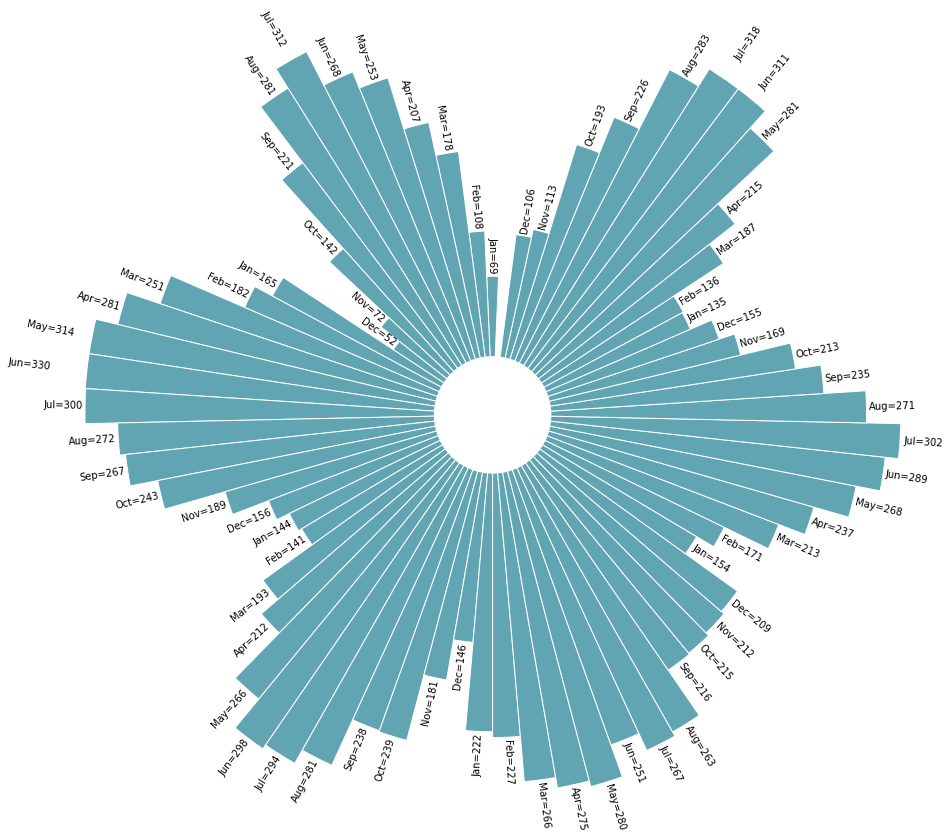

In [53]:
# 添加1个空条
PAD = 1
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# 索引包含非空bards
IDXS = slice(0, ANGLES_N - PAD)

# 布局同上
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 300)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# 添加条，子集角度
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=1
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

这个概念现在可用于在数据集的每组之间添加空间。 在这种情况下，在每个组的末尾添加 PAD 空条。

此图表更具洞察力，因为它允许人们快速比较不同的组，并比较每个组内项目的价值。

In [ ]:
# 获取组值
GROUP = df["city"].values
# 在每组末尾添加3个空条
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
# 获取正确的索引
offset = 0
IDXS = []
GROUPS_SIZE = [12, 12, 12, 12, 12, 12]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD
# 与上面相同的布局
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-300,300)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# 为每组使用不同的颜色
GROUPS_SIZE = [12, 12, 12, 12, 12, 12]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(ANGLES[IDXS],
       VALUES,
       width=WIDTH,
       color=COLORS,
       edgecolor="white",
       linewidth=1)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# 线条和注释

offset = 0 
for group, size in zip(["Chicago", "Houston", "Miami", "New York","San Francisco","Seattle"], GROUPS_SIZE):
    # 在条形下方添加线
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=73)
    ax.plot(x1, [-10] * 73, color="#333333")
    
    # 添加文本以指示组
    ax.text(
        np.mean(x1),-50, group, color="#333333", fontsize=12, 
        fontweight="bold", ha="center", va="center"
    )
    
    # 添加参考线
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=73)
    ax.plot(x2, [40] * 73, color="#bebebe",lw=0.8 )
    ax.plot(x2, [90] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [140] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [190] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [240] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [290] * 73, color="#bebebe", lw=0.8)
    
    offset += size + PAD
plt.savefig('output.png')


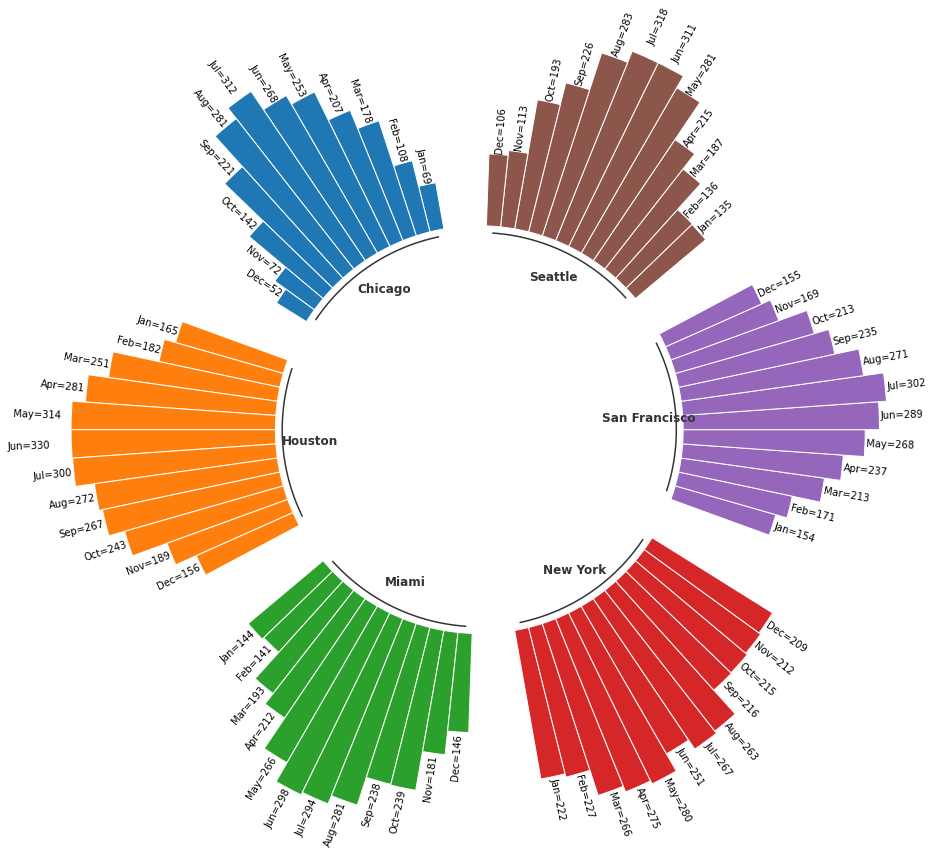

In [56]:
# 获取组值
GROUP = df["city"].values
# 在每组末尾添加3个空条
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
# 获取正确的索引
offset = 0
IDXS = []
GROUPS_SIZE = [12, 12, 12, 12, 12, 12]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD
# 与上面相同的布局
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-300,300)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# 为每组使用不同的颜色
GROUPS_SIZE = [12, 12, 12, 12, 12, 12]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(ANGLES[IDXS],
       VALUES,
       width=WIDTH,
       color=COLORS,
       edgecolor="white",
       linewidth=1)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# 线条和注释

offset = 0 
for group, size in zip(["Chicago", "Houston", "Miami", "New York","San Francisco","Seattle"], GROUPS_SIZE):
    # 在条形下方添加线
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=73)
    ax.plot(x1, [-10] * 73, color="#333333")
    
    # 添加文本以指示组
    ax.text(
        np.mean(x1),-50, group, color="#333333", fontsize=12, 
        fontweight="bold", ha="center", va="center"
    )
    
    
    offset += size + PAD
plt.savefig('output.png')


这里的观察结果按每组内的条形高度排序。 如果您的目标是了解组内和组间的最高/最低观察值，它会很有用。

该方法不会修改代码以生成绘图，它仅使用 Pandas 方法对值进行排序。 基本上，您只需在数据框创建后立即添加以下代码：

In [57]:
# 线条和注释

offset = 0
for group, size in zip([
        "Seattle -122.34 47.61","San Francisco -80.19 25.76","Houston -122.45 37.73","Miami -95.36 29.75","New York -73.94 40.73", "Chicago -87.62 41.88"      
        
], GROUPS_SIZE):
    # 在条形下方添加线
    x1 = np.linspace(ANGLES[offset + PAD],
                     ANGLES[offset + size + PAD - 1],
                     num=73)
    ax.plot(x1, [-10] * 73, color="#333333")

    # 添加文本以指示组
    ax.text(np.mean(x1),
            -50,
            group,
            color="#333333",
            fontsize=8,
            fontweight="bold",
            ha="center",
            va="center")

    offset += size + PAD
plt.rcParams['savefig.dpi'] = 300  #图片像素
plt.rcParams['figure.dpi'] = 100  #分辨率
plt.savefig('output.png', dpi=300)
plt.show()

<Figure size 600x400 with 0 Axes>

In [48]:
# 线条和注释

offset = 0 
for group, size in zip(["Chicago", "Houston", "Miami", "New York","San Francisco","Seattle"], GROUPS_SIZE):
    # 在条形下方添加线
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=73)
    ax.plot(x1, [-10] * 73, color="#333333")
    
    # 添加文本以指示组
    ax.text(
        np.mean(x1),-50, group, color="#333333", fontsize=12, 
        fontweight="bold", ha="center", va="center"
    )
    
    # 添加参考线
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=73)
    ax.plot(x2, [40] * 73, color="#bebebe",lw=0.8 )
    ax.plot(x2, [90] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [140] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [190] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [240] * 73, color="#bebebe", lw=0.8)
    ax.plot(x2, [290] * 73, color="#bebebe", lw=0.8)
    
    offset += size + PAD
plt.savefig('output.png')

<Figure size 432x288 with 0 Axes>

In [49]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["city"])
    .apply(lambda x: x.sort_values(["sunshine"], ascending = False))
    .reset_index(drop=True)
)

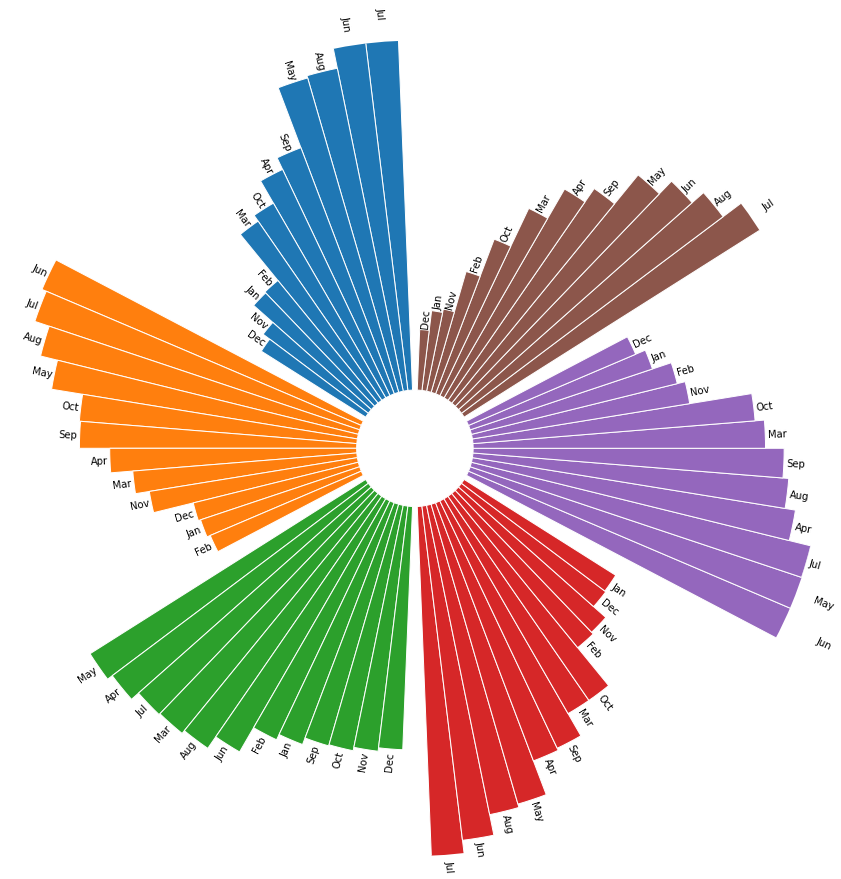

In [50]:
VALUES = df_sorted["sunshine"].values 
LABELS = df_sorted["month"].values
GROUP = df_sorted["city"].values

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 300)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [12,12,12,12,12,12]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=1
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

最后但并非最不重要的是，强烈建议为您的图表添加一些自定义。 在这里，我们添加了组名称（A、B、C 和 D），并添加了一个比例来帮助比较条形的大小。 瞧！ 代码有点长，但结果很值得！

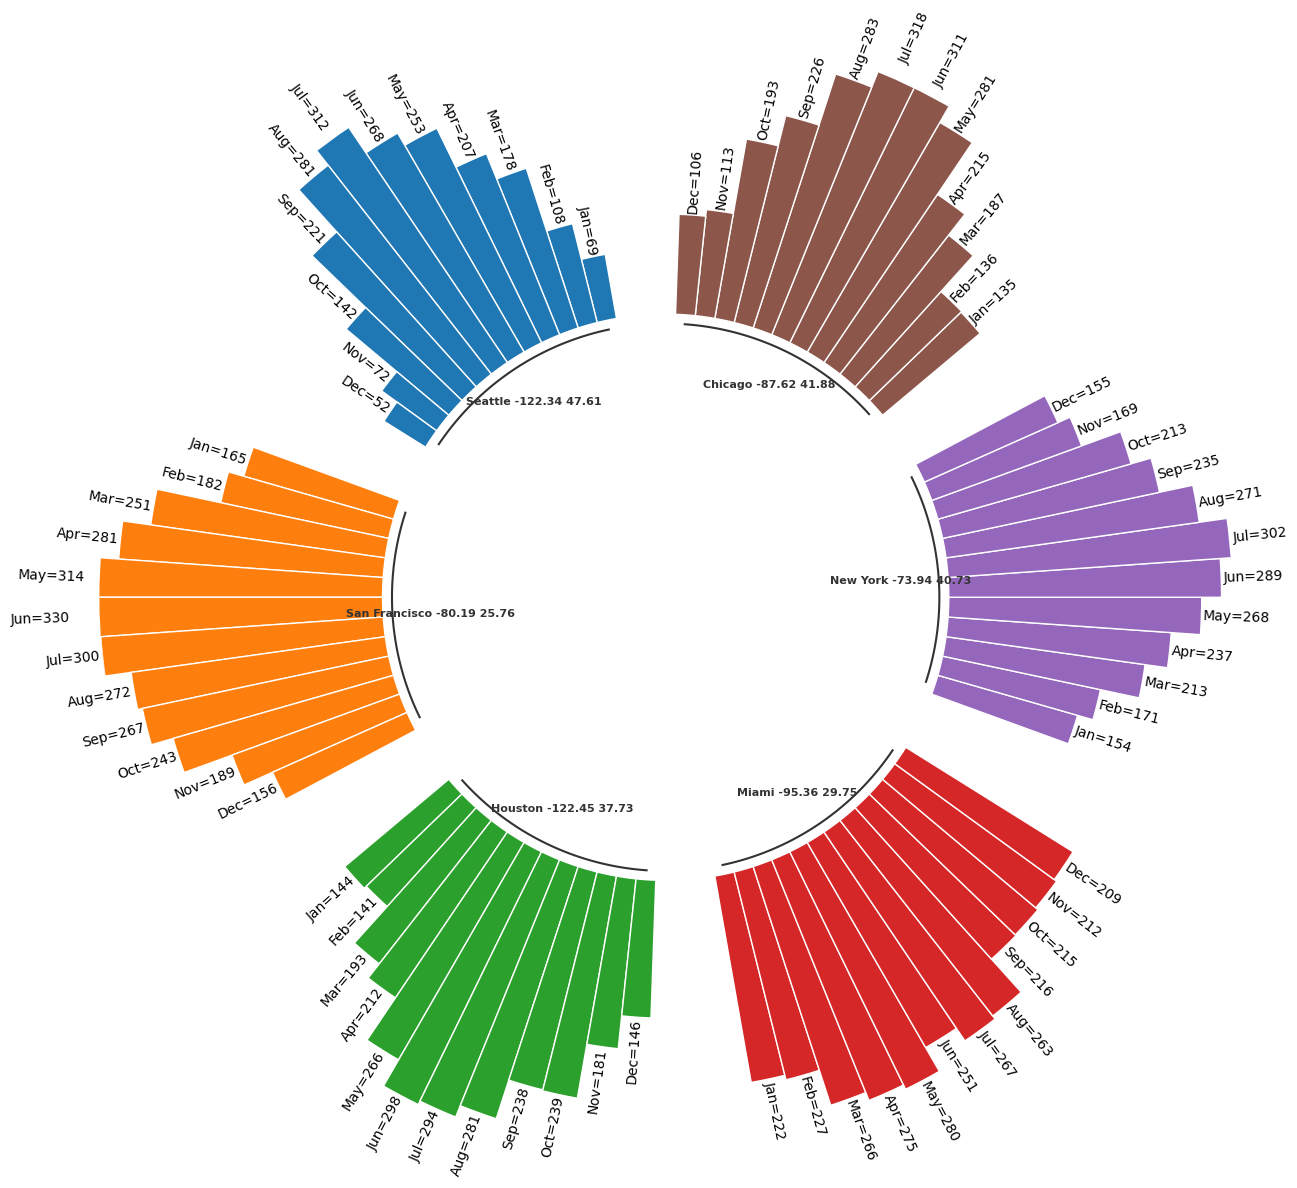

In [58]:
VALUES = df["sunshine"].values
LABELS = df["month"].values
GROUP = df["city"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [12,12,12,12,12,12]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-300, 300)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [12,12,12,12,12,12]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=1
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# 这将迭代添加参考的组的大小
# 线条和注释

offset = 0
for group, size in zip([
        "Seattle -122.34 47.61","San Francisco -80.19 25.76","Houston -122.45 37.73","Miami -95.36 29.75","New York -73.94 40.73", "Chicago -87.62 41.88"
         
        
], GROUPS_SIZE):
    # 在条形下方添加线
    x1 = np.linspace(ANGLES[offset + PAD],
                     ANGLES[offset + size + PAD - 1],
                     num=73)
    ax.plot(x1, [-10] * 73, color="#333333")

    # 添加文本以指示组
    ax.text(np.mean(x1),
            -50,
            group,
            color="#333333",
            fontsize=8,
            fontweight="bold",
            ha="center",
            va="center")


    offset += size + PAD
plt.savefig('output.png')